In [1]:
#Load libraries
import pandas as pd
import nltk
import matplotlib
import numpy

In [2]:
df = pd.read_csv("small_df.csv",delimiter=',')

Import MWE Tokenizer

In [3]:
from nltk.tokenize import MWETokenizer
mw_tokenizer = nltk.tokenize.MWETokenizer()

In [4]:
#remove score 
#df.drop(index=df.index[0], axis=0, inplace=True)
df.drop(index=[0], inplace=True)


In [5]:
#loop through csv to extract words
##turn the csv into a dictionary
all_doc = df.to_dict(orient='list')

def get_key(val):
    for key, value in all_doc.items():
        if val == value:
            return key
   
##key is header and value is an array of the type (string,POStag) after lemmazation
for val in all_doc.values():
    key = get_key(val)
    val = ' '.join(val)
    val = val.split(" ")
    res = []   #remove "\n"
    for token in val:
        res.append(token.replace('\\n', " "))
    val = ' '.join(res)
    #val = val.split(" ") do tokenization when lemmazation below
    all_doc[key] = val
#split text base on space

In [7]:
import spacy
#import spacy.en_core_web_sm
#nlp = en_core_web_sm.load()

In [8]:
#!pip3 install spacy

import spacy

In [9]:
#lemmazation
nlp = spacy.load("en_core_web_sm")
for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [(token.lemma_,token.pos_) for token in nlp(val)]

In [11]:
#remove stop-words
!pip3 install stop-words
from stop_words import get_stop_words
stopwords = get_stop_words('english')

for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [word for word in val if not word[0] in stopwords]


In [12]:
#visulization of the frequence of tokens
poll_doc = []
for val in all_doc.values():
    poll_doc+= [word[0] for word in val]

from nltk import FreqDist
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4)) 
parameters = {'axes.labelsize': 15,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)

fdist2 = FreqDist(poll_doc)

<Figure size 400x400 with 0 Axes>

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


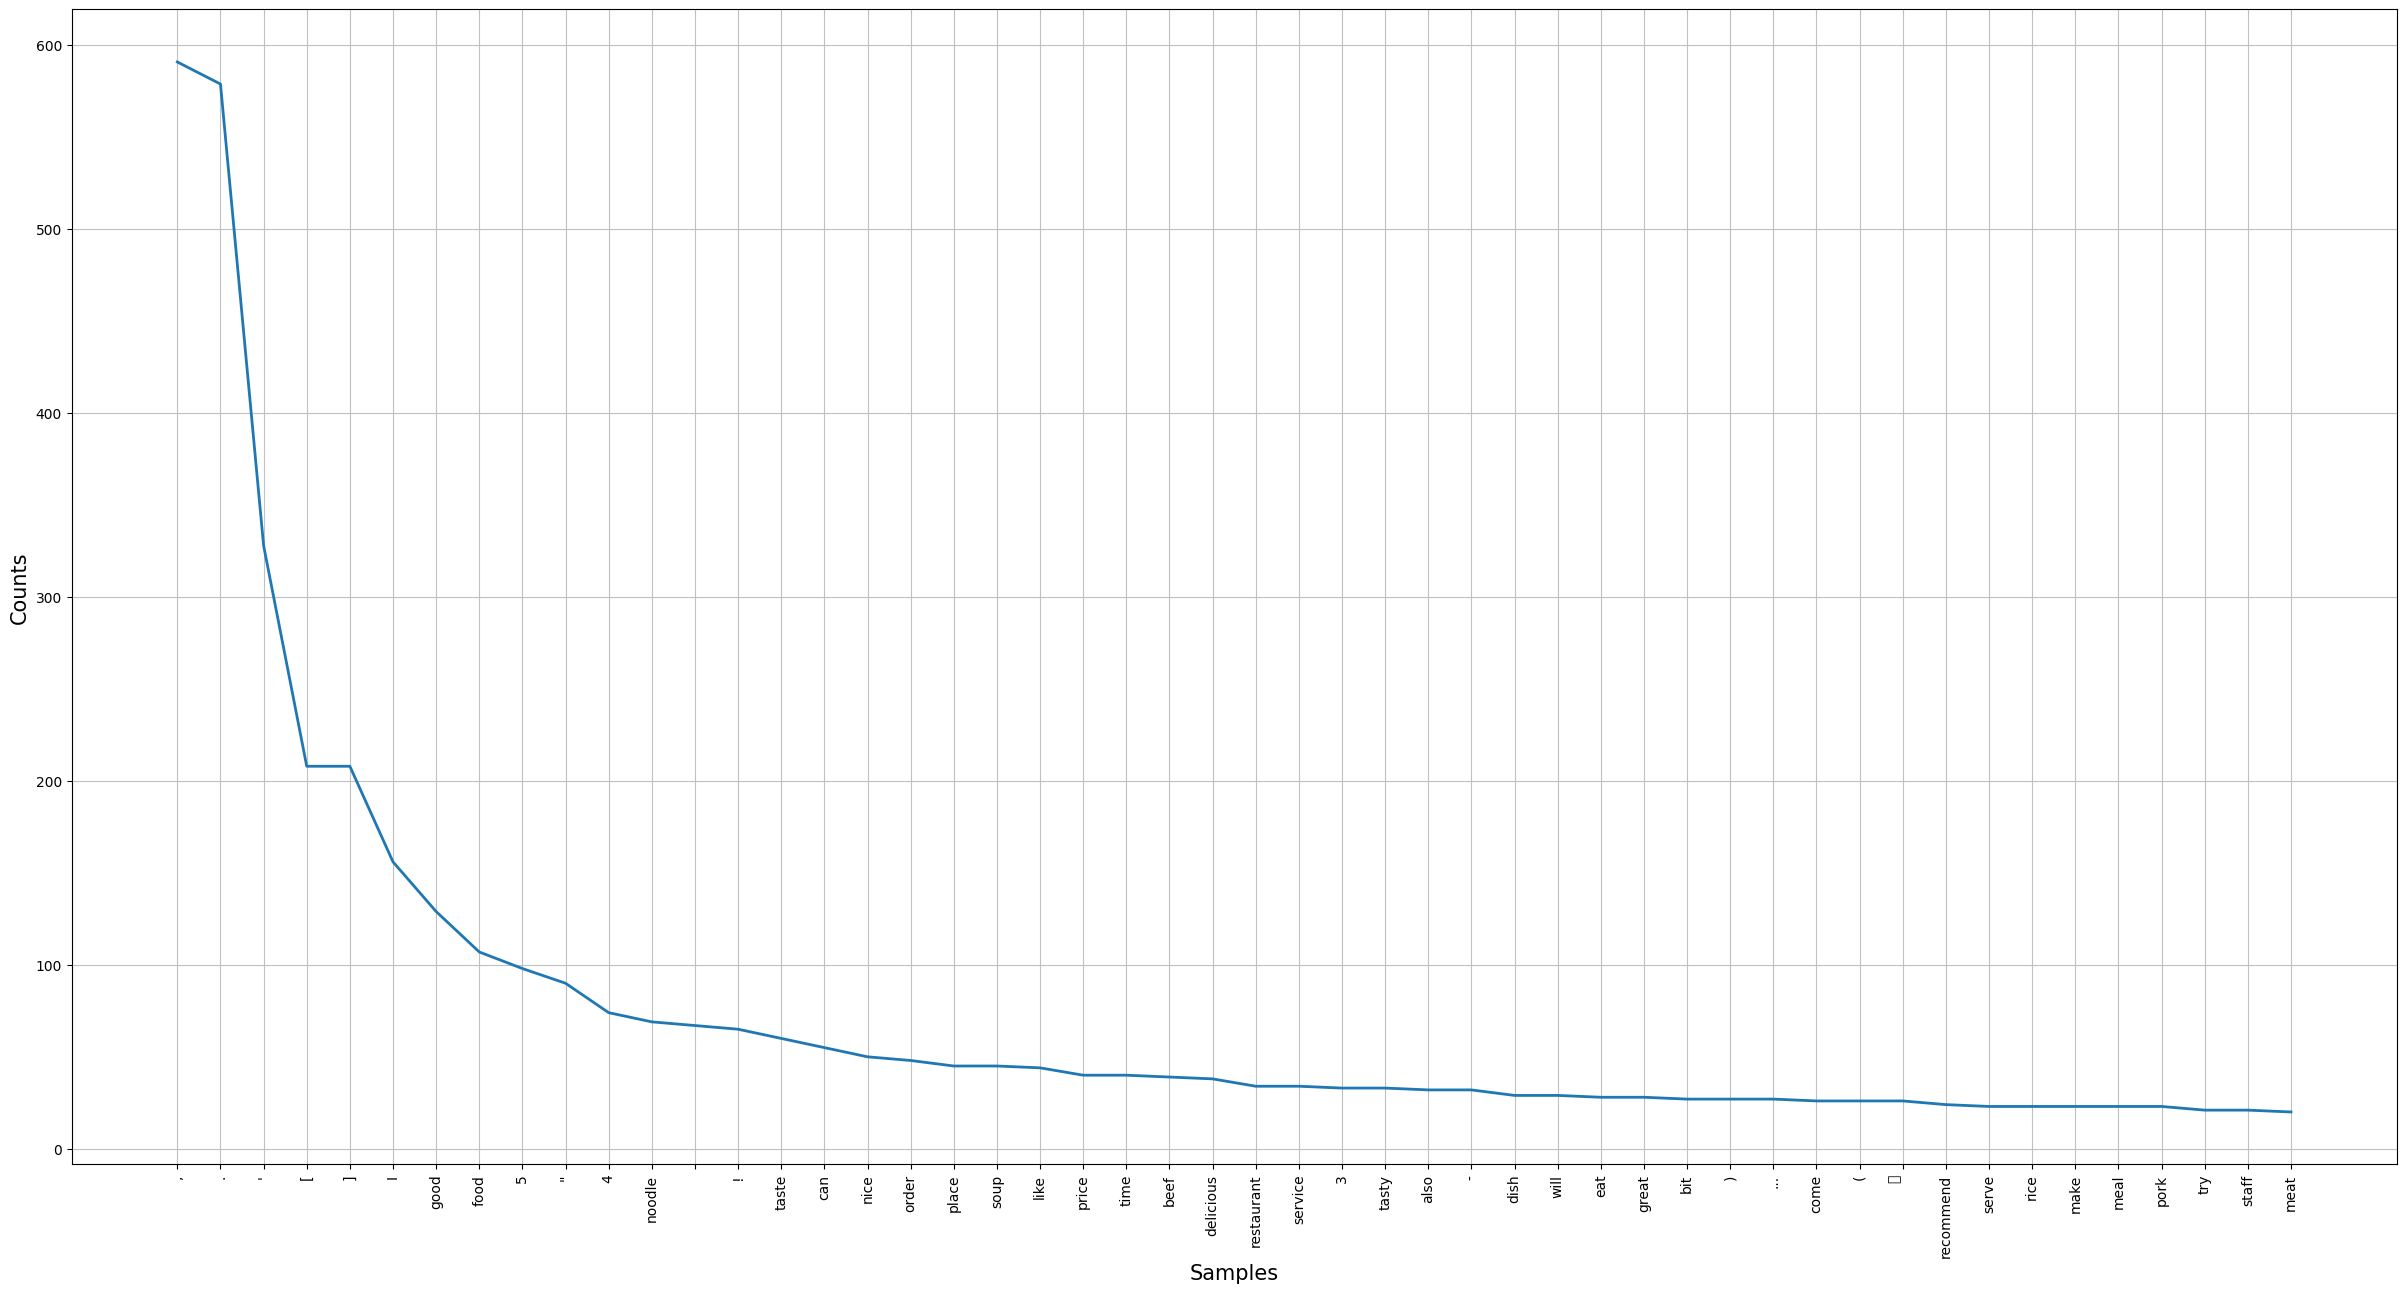

<Axes: xlabel='Samples', ylabel='Counts'>

In [13]:
plt.rcParams["figure.figsize"] = (30, 15)
fdist2.plot(50, cumulative=False)

In [14]:
#add more stopwords
num = []
for i in range(10):
    num+=str(i)
additional_stopwords = [".",",","'","[","]","(",")","..."," ","\"","!", "-"]+num

for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [word for word in val if not word[0] in additional_stopwords and word[0].isalpha()]

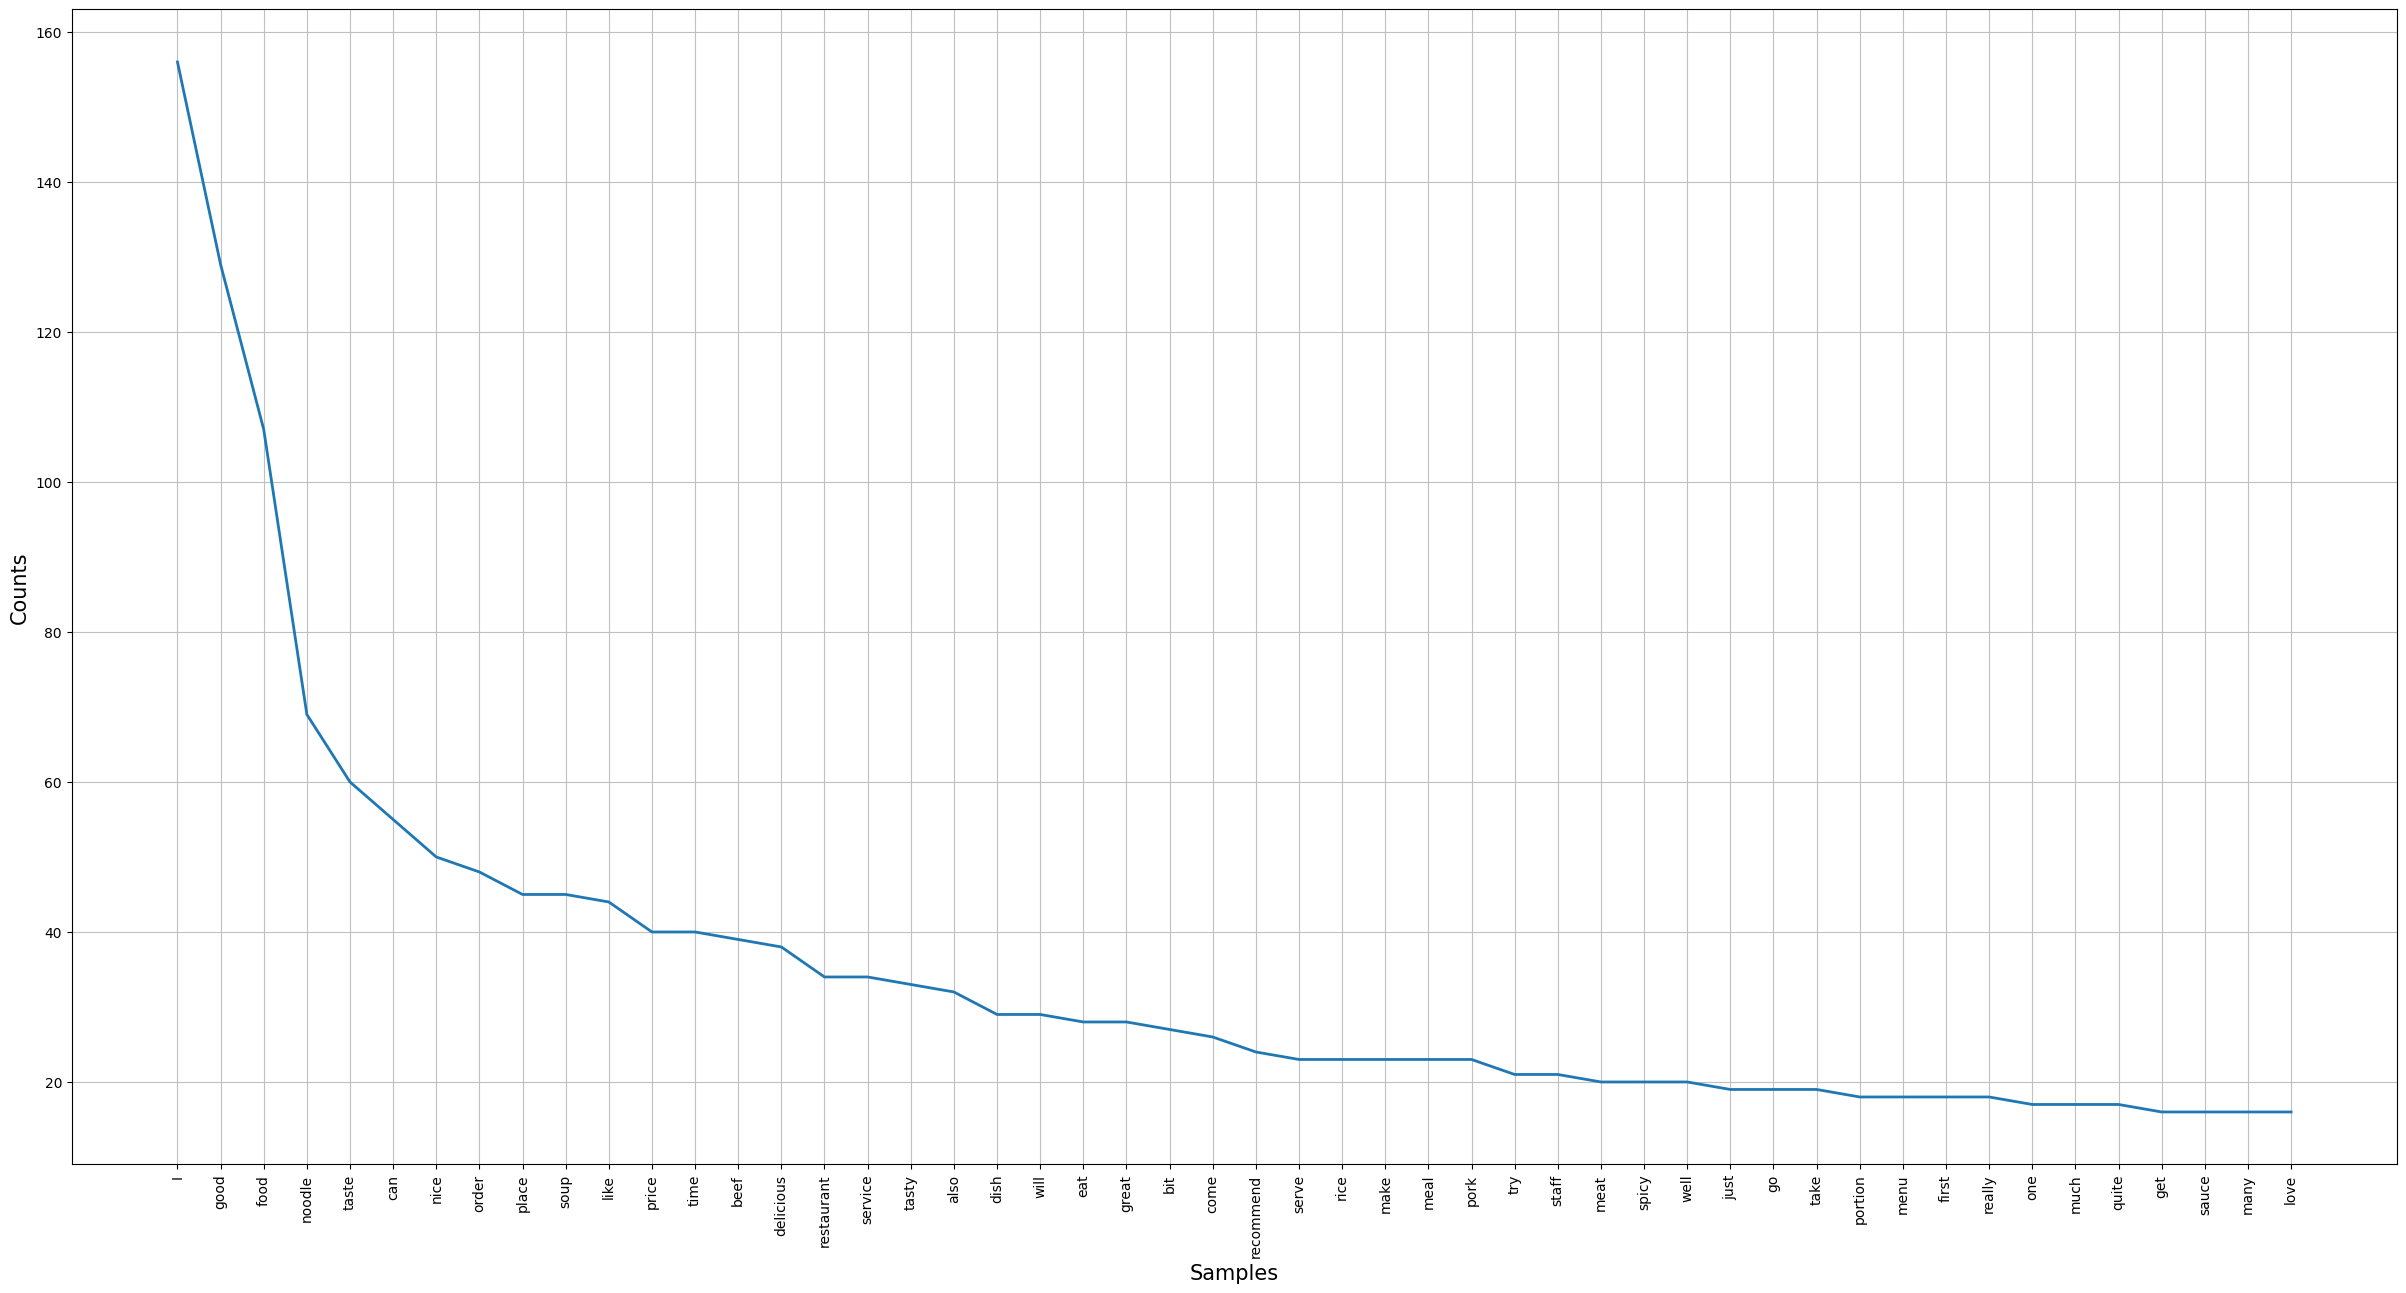

<Axes: xlabel='Samples', ylabel='Counts'>

In [15]:
poll_doc2 = []
for val in all_doc.values():
    poll_doc2+=[word[0] for word in val]

fdist = FreqDist(poll_doc2)
fdist.plot(50, cumulative=False)

In [16]:
#select Nouns/Adjectives with POS tagging
for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [bi for bi in val if bi[1]=="ADJ"]+[bi for bi in val if bi[1]=="PROPN"]+[bi for bi in val if bi[1]=="NOUN"]

In [17]:
#all_doc

{'十六區和風料理': [('fancy', 'ADJ'),
  ('good', 'ADJ'),
  ('true', 'ADJ'),
  ('cheap', 'ADJ'),
  ('good', 'ADJ'),
  ('favorite', 'ADJ'),
  ('japanese', 'ADJ'),
  ('reasonable', 'ADJ'),
  ('professional', 'ADJ'),
  ('good', 'ADJ'),
  ('japanese', 'ADJ'),
  ('nice', 'ADJ'),
  ('nice', 'ADJ'),
  ('low', 'ADJ'),
  ('average', 'ADJ'),
  ('good', 'ADJ'),
  ('annoying', 'ADJ'),
  ('average', 'ADJ'),
  ('terrible', 'ADJ'),
  ('fresh', 'ADJ'),
  ('standard', 'ADJ'),
  ('traditional', 'ADJ'),
  ('japanese', 'ADJ'),
  ('ok', 'ADJ'),
  ('sushi', 'PROPN'),
  ('sashimi', 'PROPN'),
  ('Sushi', 'PROPN'),
  ('ambient', 'NOUN'),
  ('roll', 'NOUN'),
  ('plastic', 'NOUN'),
  ('feeling', 'NOUN'),
  ('place', 'NOUN'),
  ('quality', 'NOUN'),
  ('opinion', 'NOUN'),
  ('restaurant', 'NOUN'),
  ('price', 'NOUN'),
  ('order', 'NOUN'),
  ('service', 'NOUN'),
  ('food', 'NOUN'),
  ('portion', 'NOUN'),
  ('ambience', 'NOUN'),
  ('music', 'NOUN'),
  ('volume', 'NOUN'),
  ('bit', 'NOUN'),
  ('service', 'NOUN'),
  ('attitud

In [18]:
#keep only the adjectives
adjs = []

for val in all_doc.values():
    for v in val:
        if v[1] == 'ADJ':
            adjs.append(v[0])

#convert to one string of text
text = ' '.join(str(word) for word in adjs)

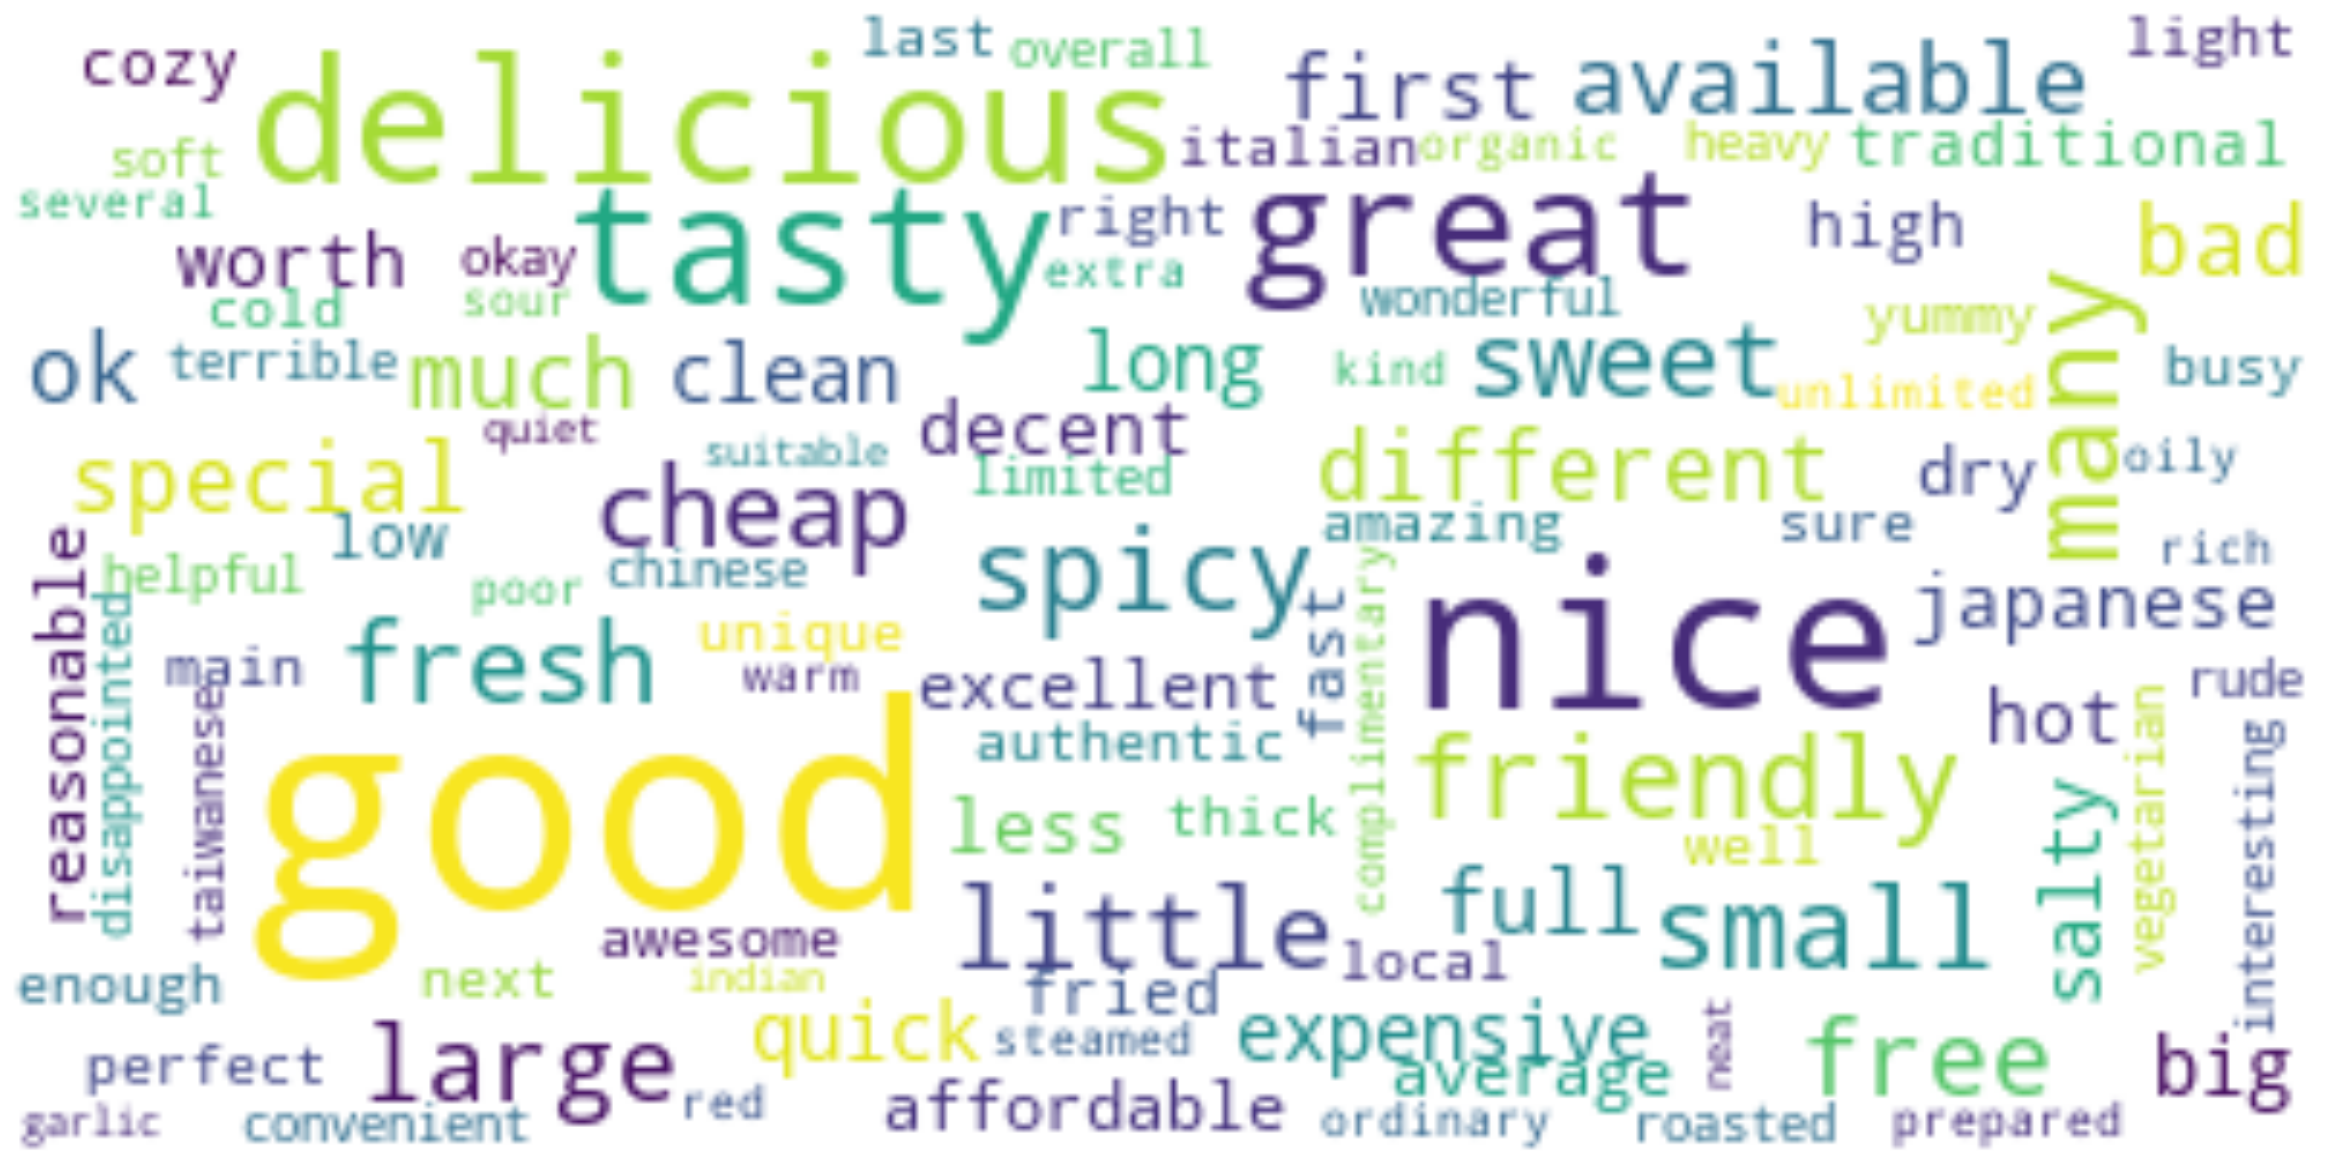

In [19]:
#!pip3 install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Generate image
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()